# STA130 LEC Week 10 (Nov 04)

## Multiple Linear Regression and such

1. Multiple Linear Regression


2. and Categorical Variables Interactions (and Logistic Regression)


3. **Self Evaluation: what's the correlation of your understand versus the true of the following items?<br>AKA what's your 0%-100% (or, techically -100%-100%) understanding level for the following topics?**
    1. Bootstrapped Confidence Intervals
    2. "Coin Flippling" sampling distribution hypothesis testing for "paired samples"
    3. Calculating p-values based on observed statistics and "sampling distributions under the null"
    4. Correlation
    5. The normal "Simple Linear Regression" model
    6. Fitting Simple Linear Regression models
    7. Making predictions from linear models
    8. Using Simple Linear Regression to evaluate the evidence of association between two continue variables
    9. Assessming the assumptions of Simple Linear Regression using residuals
    10. Hypothesis testing for two unpaired samples using a permutation test (as opposed to hypothesis testing based on differences for "paired samples")
    11. Hypothesis testing for two groups (unpaired samples) using indicator variables in Simple Linear Regression
    12. "Double" bootstrap confidence intervals estimating difference parameters for two groups (unpaired samples)


4. **Student Lecture Summary**



In [618]:
import pandas as pd

# HW and TUT grades (up until midterm)
# We don't need to consider & pre-course survey grades
# because those who didn't do the pre-course will be known automatically
gradesF23 = pd.read_csv('/Users/scottschwartz/Downloads/2024-11-07T0336_Grades-STA130H1_F_LEC0101.csv')
gradesF23 = gradesF23[2:-1].iloc[:,[2,6,7,8,9,10,11,14,15,16,17,18,19,20,24,25,26,27,28,29]]
# gradesF23.iloc[:,15:] # gradesF23.iloc[:,8:]
gradesF23['hw'] = gradesF23.iloc[:,1:7].fillna(0).astype(float).sum(axis=1)
gradesF23['tut'] = gradesF23.iloc[:,8:].fillna(0).astype(float).sum(axis=1)

# F23 pre-course survey
# students who didn't do the pre-course will be indicated as such
presurF23 = pd.read_excel('/Users/scottschwartz/Downloads/STA130PresurveyFall2023.xlsx')
presurF23 = presurF23.set_index('Email')

# F23 midterm
mtexamF23 = pd.read_csv('/Users/scottschwartz/Downloads/sta130_f23_mt-marks_.csv')
mtexamF23 = mtexamF23.set_index('Email')#['Total Points']

a1 = mtexamF23.merge(presurF23, how='left')
a1 = pd.merge(a1.rename(columns={'Student ID Number': 'ID_'}),
              gradesF23.iloc[:,[0,-2,-1]].rename(columns={'SIS User ID': 'ID_'}),
              how='left', on='ID_').fillna(0)

In [619]:
a1.iloc[:,4:51]

,Q15,Q16,Q17,Q26,Q27,Q33,Q34,Q41,Q42,Q44,...,MC-32,MC-35,MC-36,MC-37,MC-38,MC-39,MC-40,MC-43,MC-total,Total Points
0,2.0,4.0,2.0,2.0,3.0,1.0,2.0,2.0,1.0,2.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,22.0,46.0
1,0.0,1.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.0,13.5
2,1.5,2.0,2.0,2.0,4.0,3.0,0.0,1.0,4.0,2.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,24.0,48.5
3,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,14.0
4,2.0,4.0,1.0,2.0,4.0,3.0,0.0,0.0,3.0,0.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,18.0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,1.0,1.5,2.0,2.0,4.0,3.0,0.0,0.0,3.0,0.5,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,23.0,43.0
433,0.0,4.0,2.0,2.0,0.0,2.5,2.0,1.0,1.0,1.5,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,16.0,35.0
434,0.5,0.0,1.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10.0,15.5
435,2.0,4.0,0.0,1.5,4.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,17.0,28.5


In [620]:
a1.iloc[:,4:51].max()

Q15              2.00
Q16              4.00
Q17              2.00
Q26              3.00
Q27              4.00
Q33              3.00
Q34              4.00
Q41              3.00
Q42              4.00
Q44              2.00
Q45              3.00
MC-1             1.00
MC-2             1.00
MC-3             1.00
MC-4             1.00
MC-5             1.00
MC-6             1.00
MC-7             1.00
MC-8             1.00
MC-9             1.00
MC-10            1.00
MC-11            1.00
MC-12            1.00
MC-13            1.00
MC-14            1.00
MC-18            1.00
MC-19            1.00
MC-20            1.00
MC-21            1.00
MC-22            1.00
MC-23            1.00
MC-24            1.00
MC-25            1.00
MC-28            1.00
MC-29            1.00
MC-30            1.00
MC-31            1.00
MC-32            1.00
MC-35            1.00
MC-36            1.00
MC-37            1.00
MC-38            1.00
MC-39            1.00
MC-40            1.00
MC-43            1.00
MC-total  

In [621]:
# max possible
a1.iloc[:,4:51].max()[:-2].sum()

68.0

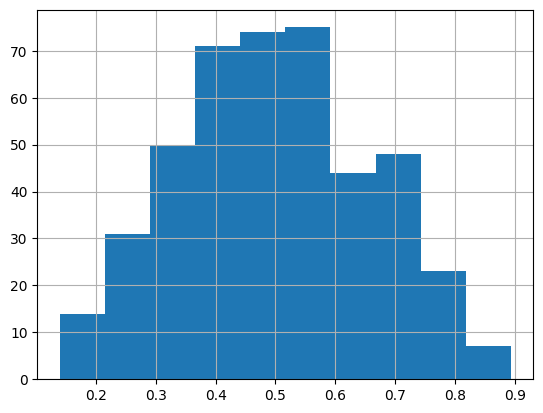

In [622]:
_ = (a1.iloc[:,4:49].sum(axis=1)/68).hist()

In [623]:
# F24 pre-course survey
# I do not see consent decisions attached to any identifying information
# Students who didn't do the pre-course will be indicated as such
presurF24 = pd.read_excel('/Users/scottschwartz/Downloads/STA130Pre-courseChatBotsurveyFall2024.xlsx')
presurF24 = presurF24.set_index('Email')
presurF24

,Are you an international student?,Is English your first language?,Please tick all that apply. You are:,What first-year calculus course are you currently taking?,What first-year programming course are you currently taking?,In what statistics program of study have you enrolled or would you like to enrol in (select your first choice)?,How would you describe your professional writing ability?,What is your experience with programming prior to starting university in September?,What is your experience with PYTHON prior to starting university in September?\n,How do you evaluate your skill level at PYTHON programming?,How do you evaluate your skill at statistical data analysis?\n,How do you evaluate your skill at performing statistical data analysis using PYTHON?\n,Which of the following statements best describe your feelings about the use of PYTHON for STA130? Select all that apply.,How much concern do you have that STA130 will not provide enough structure and support for PYTHON?,How comfortable are you working independently on your own to understand and use PYTHON code?,How interested are you in working with AI assistance as part of learning?,How comfortable are you with self-learning statistical concepts and topics?
Email,,,,,,,,,,,,,,,,,
a.conde@mail.utoronto.ca,Yes,No,"Southeast Asian (e.g. Malay, Vietnamese);",MAT137,CSC110,Data Science Specialist,Adequate,Between half a year to a year,Between half a year to a year,Intermediate,Intermediate,Beginner,I am glad we're using the same programming lan...,Not at all,Very,Not at all,Very
a.dellicolli@mail.utoronto.ca,No,Yes,"East Asian (e.g. Chinese, Korean, Japanese),",MAT135 or MAT136,None of the above,None of the above,Good,NaN,NaN,Beginner,Beginner,Beginner,I don't think programming should be a part of ...,Very,Not at all,Very,Not at all
a.salazar.rueda@mail.utoronto.ca,Yes,No,Latin American,MAT135 or MAT136,CSC108 (or equivalent programming experience),None of the above,Good,Less than half a year,Less than half a year,Beginner,Beginner,Beginner,I am glad we're using the same programming lan...,Very,Not at all,Somewhat,Somewhat
aalice.ruan@mail.utoronto.ca,No,No,"East Asian (e.g. Chinese, Korean, Japanese),",MAT137,CSC108 (or equivalent programming experience),Actuarial Science Specialist,Good,Less than half a year,Less than half a year,Beginner,Intermediate,Beginner,I am concerned that since many statistics cour...,Very,Somewhat,Somewhat,Somewhat
aaliyah.pirani@mail.utoronto.ca,No,Yes,"East Asian (e.g. Chinese, Korean, Japanese),;S...",MAT137,CSC110,None of the above,Very good,NaN,NaN,Beginner,Beginner,Beginner,I am pleased we're using Python since it's a p...,Not at all,Somewhat,Somewhat,Not at all
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ziwen.an@mail.utoronto.ca,Yes,No,"East Asian (e.g. Chinese, Korean, Japanese),",MAT137,CSC108 (or equivalent programming experience),Statistics Major,Poor,NaN,NaN,Beginner,Beginner,Beginner,I am glad we're using the same programming lan...,Very,Somewhat,Somewhat,Somewhat
ziyuehelen.wang@mail.utoronto.ca,Yes,No,"East Asian (e.g. Chinese, Korean, Japanese),",MAT137,CSC108 (or equivalent programming experience),Actuarial Science Major,Excellent,NaN,NaN,Beginner,Beginner,Beginner,I am glad we're using the same programming lan...,Very,Not at all,Not at all,Somewhat
zt.chang@mail.utoronto.ca,No,No,"East Asian (e.g. Chinese, Korean, Japanese),",MAT135 or MAT136,None of the above,Statistics Major,Adequate,Less than half a year,Less than half a year,Beginner,Beginner,Beginner,I am pleased we're using Python since it's a p...,Somewhat,Somewhat,Somewhat,Somewhat


In [624]:
mtexamF24 = pd.read_csv('/Users/scottschwartz/Downloads/mt-83915-mc-student-results_.csv', skiprows=1)
mtexamF24 = mtexamF24.rename(columns = {mtexamF24.columns[1]: 'Email'}).set_index('Email')

a2 = mtexamF24.join(presurF24).rename(columns = {'Unnamed: 62': 'Total Points'})

In [ ]:
gradesF24 = pd.read_csv('/Users/scottschwartz/Downloads/2024-11-09T0910_Grades-STA130H1_F.csv')
gradesF24 = gradesF24[2:-1]#.iloc[:,15:]
gradesF24.iloc[:,6:11]
gradesF24['hw'] = gradesF24.iloc[:,6:11].fillna(0.).astype(float).sum(axis=1)
gradesF24['tut'] = gradesF24.iloc[:,25:31].fillna(0.).astype(float).sum(axis=1)


In [627]:
# Need 'SIS Login ID' to match to Quercus (which wasn't in my F24 data for some reason)
roster = pd.read_csv('/Users/scottschwartz/Downloads/Roster-TUT0212-group(s).csv')
a2 = a2.join(roster.set_index('Email')[['UTORid']])
a2 = \
pd.merge(a2.rename(columns={'UTORid': 'ID_'}),
         gradesF24.rename(columns={'SIS Login ID': 'ID_'}),
         how='left', on='ID_').fillna(0)

/var/folders/sd/hnfh4zsn34d7xpbz9226pz200000gn/T/ipykernel_24134/1625695423.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  how='left', on='ID_').fillna(0)


In [628]:
a2.iloc[:,1:62]

,MC-1,MC-2,MC-3,MC-4,MC-5,MC-6,MC-7,MC-8,MC-9,MC-10,...,MC-52,MC-53,MC-54,MC-55,MC-56,MC-57,MC-58,MC-59,MC-60,Total Points
0,1,1,0,1,1,1,0,1,1,1,...,1,0,0,1,1,1,1,0,1,35
1,1,0,0,0,0,1,1,1,1,0,...,1,0,0,1,0,0,1,0,0,16
2,1,1,0,1,1,0,1,1,1,0,...,1,1,1,0,1,1,1,1,1,41
3,1,1,0,0,1,1,1,1,0,1,...,1,1,1,0,1,1,1,1,0,45
4,1,0,1,0,1,0,0,0,0,0,...,1,1,0,0,0,1,1,0,1,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,1,1,0,0,1,0,0,0,1,1,...,1,1,0,0,1,1,0,0,1,37
480,1,1,1,0,1,0,1,1,1,1,...,1,0,0,0,1,1,1,1,1,44
481,1,1,0,1,1,1,1,1,1,1,...,1,0,0,0,1,1,1,0,0,42
482,0,1,0,1,1,0,0,0,0,1,...,1,0,1,1,1,1,1,1,0,46


In [629]:
a2.iloc[:,1:62].max()

MC-1             1
MC-2             1
MC-3             1
MC-4             1
MC-5             1
                ..
MC-57            1
MC-58            1
MC-59            1
MC-60            1
Total Points    56
Length: 61, dtype: int64

In [630]:
# max possible
a2.iloc[:,1:62].max()[:-1].sum()

60

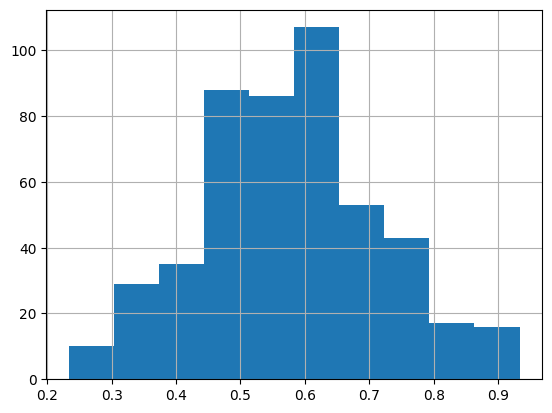

In [631]:
_ = (a2.iloc[:,1:61].sum(axis=1)/60).hist()

In [632]:
a1 = \
a1.rename(columns = 
          {'What is your experience with programming?': 'prog',
           'What is your experience with the Python programming language?': 'py_exp',
           'How do you evaluate your skill level at Python programming?': 'py_lev'})

In [633]:
a2 = \
a2.rename(columns = 
          {'What is your experience with programming prior to starting university in September?': 'prog',
           'What is your experience with PYTHON prior to starting university in September?\n': 'py_exp',
           'How do you evaluate your skill level at PYTHON programming?': 'py_lev'})

In [634]:
a1.prog.value_counts()

prog
0                                                                                                                           223
I have never used any programming language before this taking course                                                         74
I have used a programming language in a class or some other context for somewhere between up to half of a year               54
I have used a programming language in a class or some other context for somewhere between half of a year to a whole year     33
I have used a programming language in a class or some other context for more than two years                                  31
I have used a programming language in a class or some other context for somewhere between one to two years                   22
Name: count, dtype: int64

In [635]:
a2.prog.value_counts()

prog
0                                245
More than one year                98
Less than half a year             91
Between half a year to a year     50
Name: count, dtype: int64

In [636]:
a1['prog'] = a1.prog.replace({
"I have never used any programming language before this taking course": '<0.5yr',
"I have used a programming language in a class or some other context for somewhere between up to half of a year": '<0.5yr',
"I have used a programming language in a class or some other context for somewhere between half of a year to a whole year": '>0.5yr',
"I have used a programming language in a class or some other context for more than two years": '>0.5yr',
"I have used a programming language in a class or some other context for somewhere between one to two years": '>0.5yr'})
a1['prog'] = a1.prog.replace(0, 'aNA')

a1.prog.value_counts()

prog
aNA       223
<0.5yr    128
>0.5yr     86
Name: count, dtype: int64

In [637]:
a2.prog = a2.prog.replace({
"More than one year": '>0.5yr',
"Less than half a year": '<0.5yr',
"Between half a year to a year":'>0.5yr'    
}).replace(0, 'aNA')

a2.prog.value_counts()

prog
aNA       245
>0.5yr    148
<0.5yr     91
Name: count, dtype: int64

In [638]:
a1.py_exp.value_counts()

py_exp
0                                                                                                                                                        223
I have never used the Python programming language before this taking course                                                                              107
I have used the Python programming language before taking this course, although it is not the primary programming language that I use                     56
I have used the Python programming language before this taking course, and it is a primary programming language that I routinely use when programming     43
Other                                                                                                                                                      8
Name: count, dtype: int64

In [639]:
a2.py_exp.value_counts()

py_exp
0                                281
Less than half a year            102
More than a year                  51
Between half a year to a year     50
Name: count, dtype: int64

In [640]:
a1['py_exp'] = a1.py_exp.replace({"Other": "aNA",
"I have never used the Python programming language before this taking course": '<0.5yr',#'Less than half a year',
"I have used the Python programming language before taking this course, although it is not the primary programming language that I use": '>0.5yr',#'Between half a year to a year',
"I have used the Python programming language before this taking course, and it is a primary programming language that I routinely use when programming": '>0.5yr'})#'More than a year'})
a1['py_exp'] = a1.py_exp.replace(0, 'aNA')
a1.py_exp.value_counts()

py_exp
aNA       231
<0.5yr    107
>0.5yr     99
Name: count, dtype: int64

In [641]:
a2.py_exp = a2.py_exp.replace({
"More than a year": '>0.5yr',#
"Less than half a year": '<0.5yr',#
"Between half a year to a year":'>0.5yr'    
}).replace(0, 'aNA')
a2.py_exp.value_counts()

py_exp
aNA       281
<0.5yr    102
>0.5yr    101
Name: count, dtype: int64

In [642]:
a1['py_lev'].value_counts()

py_lev
0               223
Beginner        153
Intermediate     49
Advanced         10
Expert            1
Other             1
Name: count, dtype: int64

In [643]:
a1['py_lev'] = a1['py_lev'].replace(0, 'aNA').replace("Other", "aNA").replace("Advanced", "Intermediate").replace("Expert", "Intermediate")
a1['py_lev'].value_counts()

py_lev
aNA             224
Beginner        153
Intermediate     60
Name: count, dtype: int64

In [644]:
a2.py_lev.value_counts()

py_lev
Beginner        246
0               140
Intermediate     79
Advanced         19
Name: count, dtype: int64

In [645]:
# I've just noticed that there are different non-responses in the survey...
a2['py_lev'] = a2['py_lev'].replace(0, 'aNA').replace("Advanced", "Intermediate")
a2.py_lev.value_counts()

py_lev
Beginner        246
aNA             140
Intermediate     98
Name: count, dtype: int64

In [663]:
import statsmodels.formula.api as smf

a1['year'] = 'F23'
a2['year'] = 'F24'
a1a2 = \
pd.concat([a1[['Total Points','prog','py_exp','py_lev','year']],
           a2[['Total Points','prog','py_exp','py_lev','year']]], ignore_index=True)

linear_model_specification = '''
Q('Total Points') ~ year*C(prog, Treatment(reference='>0.5yr'))
                  + year*C(py_exp, Treatment(reference='>0.5yr')) 
                  + year*C(py_lev, Treatment(reference='Intermediate'))
'''
m2324 = smf.ols(linear_model_specification, a1a2)
m2324.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Q('Total Points')   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     13.39
Date:                Sun, 10 Nov 2024   Prob (F-statistic):           1.83e-27
Time:                        10:39:06   Log-Likelihood:                -3310.8
No. Observations:                 921   AIC:                             6650.
Df Residuals:                     907   BIC:                             6717.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================================
                                                                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                 41.8168      1.161     36.003      0.000      39.537      44.096
year[T.F24]                                                               -2.6273      1.494     -1.759      0.079      -5.559       0.304
C(prog, Treatment(reference='>0.5yr'))[T.<0.5yr]                          -5.6692      1.654     -3.428      0.001      -8.915      -2.423
C(prog, Treatment(reference='>0.5yr'))[T.aNA]                            -20.2437      9.477     -2.136      0.033     -38.843      -1.644
C(py_exp, Treatment(reference='>0.5yr'))[T.<0.5yr]                        -0.7095      1.664     -0.426      0.670      -3.975       2.556
C(py_exp, Treatment(reference='>0.5yr'))[T.aNA]                            2.7831      3.411      0.816      0.415      -3.911       9.477
C(py_lev, Treatment(reference='Intermediate'))[T.Beginner]                -0.0523      1.914     -0.027      0.978      -3.809       3.704
C(py_lev, Treatment(reference='Intermediate'))[T.aNA]                      5.6426      9.108      0.620      0.536     -12.232      23.517
year[T.F24]:C(prog, Treatment(reference='>0.5yr'))[T.<0.5yr]               4.1544      2.275      1.826      0.068      -0.311       8.620
year[T.F24]:C(prog, Treatment(reference='>0.5yr'))[T.aNA]                 19.4476      9.630      2.020      0.044       0.548      38.347
year[T.F24]:C(py_exp, Treatment(reference='>0.5yr'))[T.<0.5yr]            -0.4186      2.468     -0.170      0.865      -5.263       4.426
year[T.F24]:C(py_exp, Treatment(reference='>0.5yr'))[T.aNA]               -7.3087      3.969     -1.842      0.066     -15.098       0.480
year[T.F24]:C(py_lev, Treatment(reference='Intermediate'))[T.Beginner]    -0.6534      2.515     -0.260      0.795      -5.590       4.283
year[T.F24]:C(py_lev, Treatment(reference='Intermediate'))[T.aNA]         -8.3605      9.327     -0.896      0.370     -26.666       9.945
==============================================================================
Omnibus:                        6.079   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.048   Jarque-Bera (JB):                5.612
Skew:                           0.142   Prob(JB):                       0.0605
Kurtosis:                       2.743   Cond. No.                         107.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [647]:
linear_model_specification = '''
Q('Total Points') ~ year*C(prog, Treatment(reference='>0.5yr'))
                  + year*C(py_exp, Treatment(reference='>0.5yr')) 
'''
m2324 = smf.ols(linear_model_specification, a1a2)
m2324.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Q('Total Points')   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     18.94
Date:                Sun, 10 Nov 2024   Prob (F-statistic):           3.29e-29
Time:                        10:31:00   Log-Likelihood:                -3312.6
No. Observations:                 921   AIC:                             6645.
Df Residuals:                     911   BIC:                             6694.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================================================================
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------
Intercept                                                         41.8422      1.000     41.840      0.000      39.879      43.805
year[T.F24]                                                       -2.7895      1.335     -2.090      0.037      -5.409      -0.170
C(prog, Treatment(reference='>0.5yr'))[T.<0.5yr]                  -5.8242      1.492     -3.904      0.000      -8.752      -2.896
C(prog, Treatment(reference='>0.5yr'))[T.aNA]                    -14.6910      3.450     -4.258      0.000     -21.462      -7.920
C(py_exp, Treatment(reference='>0.5yr'))[T.<0.5yr]                -0.6015      1.483     -0.406      0.685      -3.512       2.309
C(py_exp, Treatment(reference='>0.5yr'))[T.aNA]                    2.8477      3.372      0.844      0.399      -3.770       9.466
year[T.F24]:C(prog, Treatment(reference='>0.5yr'))[T.<0.5yr]       4.1638      2.141      1.944      0.052      -0.039       8.366
year[T.F24]:C(prog, Treatment(reference='>0.5yr'))[T.aNA]         12.7892      3.798      3.368      0.001       5.336      20.242
year[T.F24]:C(py_exp, Treatment(reference='>0.5yr'))[T.<0.5yr]    -0.7947      2.181     -0.364      0.716      -5.075       3.485
year[T.F24]:C(py_exp, Treatment(reference='>0.5yr'))[T.aNA]       -8.0009      3.793     -2.109      0.035     -15.445      -0.557
==============================================================================
Omnibus:                        6.002   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                5.509
Skew:                           0.138   Prob(JB):                       0.0636
Kurtosis:                       2.740   Cond. No.                         37.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [648]:
a1['Is English your first language?'] = a1['Is English your first language?'].replace(0,'aNA')
a1.rename(columns={'Is English your first language?': 'Eng1st'}, inplace=True)
a1['Eng1st'].value_counts()

Eng1st
aNA    223
No     130
Yes     84
Name: count, dtype: int64

In [649]:
a2['Is English your first language?'] = a2['Is English your first language?'].replace(0,'aNA')
a2.rename(columns={'Is English your first language?': 'Eng1st'}, inplace=True)
a2['Eng1st'].value_counts()

Eng1st
No     226
aNA    140
Yes    118
Name: count, dtype: int64

In [650]:
pystats = a1['How effectively do you feel you can perform statistical data analysis with Python?\n']
a1['pystat'] = (pystats == 'Somewhat effectively') | (pystats == 'Very effectively')
a1['pystat'].sum()


71

In [651]:
pystats = a2['How do you evaluate your skill at performing statistical data analysis\xa0using PYTHON?\n']
a2['pystat'] = (pystats == 'Intermediate') | (pystats == 'Advanced')
a2['pystat'].sum()


31

In [665]:
a1a2 = \
pd.concat([a1[['Total Points','prog','year','py_exp','Eng1st','pystat','hw','tut']],
           a2[['Total Points','prog','year','py_exp','Eng1st','pystat','hw','tut']]], ignore_index=True)

In [653]:
linear_model_specification = '''
Q('Total Points') ~ year*C(prog, Treatment(reference='>0.5yr'))
                  + year*C(py_exp, Treatment(reference='>0.5yr'))
                  + I(Eng1st=='Yes') + pystat + scale(hw) + scale(tut)
'''
m2324 = smf.ols(linear_model_specification, a1a2)
m2324.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Q('Total Points')   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     34.63
Date:                Sun, 10 Nov 2024   Prob (F-statistic):           1.46e-70
Time:                        10:31:04   Log-Likelihood:                -3206.0
No. Observations:                 921   AIC:                             6440.
Df Residuals:                     907   BIC:                             6508.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================================================================
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------
Intercept                                                         37.5299      1.221     30.728      0.000      35.133      39.927
year[T.F24]                                                        1.3730      1.650      0.832      0.406      -1.866       4.612
C(prog, Treatment(reference='>0.5yr'))[T.<0.5yr]                  -4.7131      1.343     -3.508      0.000      -7.350      -2.077
C(prog, Treatment(reference='>0.5yr'))[T.aNA]                    -11.8367      3.129     -3.783      0.000     -17.977      -5.696
C(py_exp, Treatment(reference='>0.5yr'))[T.<0.5yr]                 0.2611      1.329      0.197      0.844      -2.346       2.868
C(py_exp, Treatment(reference='>0.5yr'))[T.aNA]                    3.2348      3.019      1.072      0.284      -2.689       9.159
I(Eng1st == 'Yes')[T.True]                                         2.0980      0.715      2.933      0.003       0.694       3.502
pystat[T.True]                                                    -0.3831      0.948     -0.404      0.686      -2.244       1.478
year[T.F24]:C(prog, Treatment(reference='>0.5yr'))[T.<0.5yr]       3.3063      1.919      1.723      0.085      -0.461       7.073
year[T.F24]:C(prog, Treatment(reference='>0.5yr'))[T.aNA]         11.3505      3.426      3.314      0.001       4.628      18.073
year[T.F24]:C(py_exp, Treatment(reference='>0.5yr'))[T.<0.5yr]    -1.3157      1.952     -0.674      0.501      -5.148       2.516
year[T.F24]:C(py_exp, Treatment(reference='>0.5yr'))[T.aNA]       -7.6512      3.400     -2.250      0.025     -14.324      -0.979
scale(hw)                                                          3.2463      0.506      6.416      0.000       2.253       4.239
scale(tut)                                                         1.3446      0.758      1.773      0.077      -0.144       2.833
==============================================================================
Omnibus:                        3.994   Durbin-Watson:                   1.868
Prob(Omnibus):                  0.136   Jarque-Bera (JB):                4.020
Skew:                           0.161   Prob(JB):                        0.134
Kurtosis:                       2.962   Cond. No.                         38.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [654]:
linear_model_specification = '''
Q('Total Points') ~ year*I(prog=='>0.5yr')
                  + year*C(py_exp, Treatment(reference='>0.5yr'))
                  + year*I(Eng1st=='Yes') + pystat + scale(hw) + scale(tut)
'''
m2324 = smf.ols(linear_model_specification, a1a2)
m2324.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Q('Total Points')   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     36.73
Date:                Sun, 10 Nov 2024   Prob (F-statistic):           5.96e-70
Time:                        10:31:05   Log-Likelihood:                -3209.4
No. Observations:                 921   AIC:                             6445.
Df Residuals:                     908   BIC:                             6508.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================================================================
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------
Intercept                                                         32.5306      1.458     22.316      0.000      29.670      35.392
year[T.F24]                                                        5.3846      2.216      2.430      0.015       1.036       9.733
I(prog == '>0.5yr')[T.True]                                        4.8591      1.349      3.602      0.000       2.211       7.507
C(py_exp, Treatment(reference='>0.5yr'))[T.<0.5yr]                 0.3881      1.335      0.291      0.771      -2.232       3.008
C(py_exp, Treatment(reference='>0.5yr'))[T.aNA]                   -3.4211      1.442     -2.373      0.018      -6.251      -0.591
I(Eng1st == 'Yes')[T.True]                                         2.1093      1.141      1.849      0.065      -0.130       4.349
pystat[T.True]                                                    -0.1288      0.945     -0.136      0.892      -1.983       1.725
year[T.F24]:I(prog == '>0.5yr')[T.True]                           -3.8897      1.850     -2.103      0.036      -7.520      -0.259
year[T.F24]:C(py_exp, Treatment(reference='>0.5yr'))[T.<0.5yr]    -1.6060      1.940     -0.828      0.408      -5.413       2.201
year[T.F24]:C(py_exp, Treatment(reference='>0.5yr'))[T.aNA]       -0.5643      2.038     -0.277      0.782      -4.564       3.435
year[T.F24]:I(Eng1st == 'Yes')[T.True]                             0.0227      1.456      0.016      0.988      -2.835       2.881
scale(hw)                                                          3.2039      0.508      6.313      0.000       2.208       4.200
scale(tut)                                                         1.4386      0.761      1.890      0.059      -0.055       2.933
==============================================================================
Omnibus:                        4.759   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.093   Jarque-Bera (JB):                4.821
Skew:                           0.174   Prob(JB):                       0.0898
Kurtosis:                       2.938   Cond. No.                         23.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [655]:
linear_model_specification = '''
Q('Total Points') ~ year*I(prog=='>0.5yr')
                  + I(py_exp=='aNA')
                  + I(Eng1st=='Yes') + pystat + scale(hw) + scale(tut)
'''
m2324 = smf.ols(linear_model_specification, a1a2)
m2324.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Q('Total Points')   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     55.14
Date:                Sun, 10 Nov 2024   Prob (F-statistic):           4.19e-73
Time:                        10:31:06   Log-Likelihood:                -3210.0
No. Observations:                 921   AIC:                             6438.
Df Residuals:                     912   BIC:                             6481.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                  32.5545      0.828     39.319      0.000      30.930      34.179
year[T.F24]                                 4.5969      1.121      4.101      0.000       2.397       6.797
I(prog == '>0.5yr')[T.True]                 4.8190      1.081      4.456      0.000       2.697       6.941
I(py_exp == 'aNA')[T.True]                 -3.3406      0.677     -4.937      0.000      -4.669      -2.013
I(Eng1st == 'Yes')[T.True]                  2.1504      0.706      3.047      0.002       0.765       3.535
pystat[T.True]                              0.0122      0.928      0.013      0.990      -1.810       1.834
year[T.F24]:I(prog == '>0.5yr')[T.True]    -3.4434      1.257     -2.739      0.006      -5.910      -0.976
scale(hw)                                   3.1955      0.505      6.332      0.000       2.205       4.186
scale(tut)                                  1.4478      0.757      1.914      0.056      -0.037       2.933
==============================================================================
Omnibus:                        4.682   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.096   Jarque-Bera (JB):                4.738
Skew:                           0.173   Prob(JB):                       0.0936
Kurtosis:                       2.943   Cond. No.                         8.58
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [840]:
a1['MTgrade'] = a1['Total Points']/50*100
a2['MTgrade'] = a2['Total Points']/48*100

a1a2 = \
pd.concat([a1[['MTgrade','prog','year','py_exp','Eng1st','pystat','hw','tut']],
           a2[['MTgrade','prog','year','py_exp','Eng1st','pystat','hw','tut']]], ignore_index=True)


In [841]:
# a2['year']='f24' C(year, Treatment(reference='F24'))
linear_model_specification = '''
Q('MTgrade') ~ I(Eng1st=='Yes') + C(year, Treatment(reference='F24'))*I(prog=='>0.5yr')
             + I(py_exp=='aNA') + pystat
             + scale(hw) + scale(tut)
''' 
m2324 = smf.ols(linear_model_specification, a1a2)
m2324.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Q('MTgrade')   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     56.08
Date:                Sun, 10 Nov 2024   Prob (F-statistic):           3.40e-74
Time:                        19:32:14   Log-Likelihood:                -3865.2
No. Observations:                 921   AIC:                             7748.
Df Residuals:                     912   BIC:                             7792.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================================
                                                                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                 76.9877      1.691     45.540      0.000      73.670      80.306
I(Eng1st == 'Yes')[T.True]                                                 4.3902      1.437      3.054      0.002       1.569       7.211
C(year, Treatment(reference='F24'))[T.F23]                               -11.6114      2.283     -5.085      0.000     -16.093      -7.130
I(prog == '>0.5yr')[T.True]                                                3.0045      1.843      1.631      0.103      -0.612       6.621
I(py_exp == 'aNA')[T.True]                                                -6.8113      1.378     -4.942      0.000      -9.516      -4.106
pystat[T.True]                                                            -0.0046      1.891     -0.002      0.998      -3.716       3.707
C(year, Treatment(reference='F24'))[T.F23]:I(prog == '>0.5yr')[T.True]     6.5050      2.560      2.541      0.011       1.480      11.530
scale(hw)                                                                  6.6698      1.028      6.489      0.000       4.652       8.687
scale(tut)                                                                 2.5888      1.541      1.680      0.093      -0.436       5.613
==============================================================================
Omnibus:                        4.707   Durbin-Watson:                   1.882
Prob(Omnibus):                  0.095   Jarque-Bera (JB):                4.786
Skew:                           0.171   Prob(JB):                       0.0914
Kurtosis:                       2.914   Cond. No.                         8.09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [857]:
tmp = a1a2.copy()
tmp.loc[:,['MTgrade','hw','tut']]=[0,a1a2.hw.mean(),a1a2.tut.mean()]
tmp = tmp.drop_duplicates()
_X_ = tmp[(tmp.prog=='>0.5yr')&(tmp.py_exp=='>0.5yr')&tmp.pystat&(tmp.Eng1st=='No')]
_X_

,MTgrade,prog,year,py_exp,Eng1st,pystat,hw,tut
38,0.0,>0.5yr,F23,>0.5yr,No,True,4.12114,9.180022
437,0.0,>0.5yr,F24,>0.5yr,No,True,4.12114,9.180022


In [858]:
m2324.fit().predict(_X_)

38     74.881284
437    79.987630
dtype: float64

In [859]:
_X_.iloc[:,0] = m2324.fit().predict(_X_)
_X_

,MTgrade,prog,year,py_exp,Eng1st,pystat,hw,tut
38,74.881284,>0.5yr,F23,>0.5yr,No,True,4.12114,9.180022
437,79.987630,>0.5yr,F24,>0.5yr,No,True,4.12114,9.180022


In [874]:
final = pd.DataFrame(m2324.fit().summary().tables[1]).rename(columns={0:' '}).set_index(' ')
final.columns = final.iloc[0,:].values
final = final[1:]
final.index = ['beta0','Native English','F23','>0.5 years coding',
               'no answer python level', 'stats with python intermediate',
               'F23 x ">0.5 years coding"', 
               'standardized HW score', 'standardized TUT score']
final

,coef,std err,t,P>|t|,[0.025,0.975]
beta0,76.9877,1.691,45.540,0.000,73.670,80.306
Native English,4.3902,1.437,3.054,0.002,1.569,7.211
F23,-11.6114,2.283,-5.085,0.000,-16.093,-7.130
>0.5 years coding,3.0045,1.843,1.631,0.103,-0.612,6.621
no answer python level,-6.8113,1.378,-4.942,0.000,-9.516,-4.106
stats with python intermediate,-0.0046,1.891,-0.002,0.998,-3.716,3.707
"F23 x "">0.5 years coding""",6.5050,2.560,2.541,0.011,1.480,11.530
standardized HW score,6.6698,1.028,6.489,0.000,4.652,8.687
standardized TUT score,2.5888,1.541,1.680,0.093,-0.436,5.613


In [ ]:
QbyQ1 = \
pd.melt(a1.iloc[:,15:49].reset_index().join(a1[['prog','year','py_exp','Eng1st','pystat','hw','tut']]),
        id_vars=['index','prog','year','py_exp','Eng1st','pystat','hw','tut'], 
        value_vars=a1.columns[15:49].values)
QbyQ1.variable = QbyQ1.variable+"-F23"
QbyQ1['index'] = QbyQ1['index'].astype(str)+"-F23"
QbyQ1['progF23'] = QbyQ1['prog']
#QbyQ1['hw'] = (QbyQ1['hw']-QbyQ1['hw'].mean())/QbyQ1['hw'].std()
#QbyQ1['tut'] = (QbyQ1['tut']-QbyQ1['tut'].mean())/QbyQ1['tut'].std()
QbyQ1

In [ ]:
QbyQ2 = \
pd.melt(a2.iloc[:,1:61].reset_index().join(a2[['prog','year','py_exp','Eng1st','pystat','hw','tut']]),
        id_vars=['index','prog','year','py_exp','Eng1st','pystat','hw','tut'], 
        value_vars=a2.columns[1:61].values)
QbyQ2.variable = QbyQ2.variable+"-F24"
QbyQ2['index'] = QbyQ2['index'].astype(str)+"-F24"
QbyQ2['progF23'] = 0
#QbyQ2['hw'] = (QbyQ2['hw']-QbyQ2['hw'].mean())/QbyQ2['hw'].std()
#QbyQ2['tut'] = (QbyQ2['tut']-QbyQ2['tut'].mean())/QbyQ2['tut'].std()
QbyQ2

In [993]:
# C(index, Treatment(reference='0-F23'))
# variable + index 
#  + I(py_exp=='aNA') + 
# C(year, Treatment(reference='F24'))*  + I(progF23=='>0.5yr')
linear_form = '''
value ~ -1 
      + variable:I(prog=='>0.5yr') 
      + variable*I(Eng1st=='Yes')
      + variable*I(py_exp=='aNA')
      + variable*scale(hw) + variable*scale(tut)
'''
logistic_regression = smf.logit(linear_form, 
                                data=pd.concat([QbyQ1,QbyQ2], ignore_index=True))

In [1019]:
logistic_regression_fit = logistic_regression.fit()

         Current function value: 0.567627
         Iterations: 35


/Users/scottschwartz/miniconda3/envs/STA410/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [1020]:
logistic_regression_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  value   No. Observations:                43898
Model:                          Logit   Df Residuals:                    43334
Method:                           MLE   Df Model:                          563
Date:                Mon, 11 Nov 2024   Pseudo R-squ.:                  0.1706
Time:                        07:13:51   Log-Likelihood:                -24918.
converged:                      False   LL-Null:                       -30043.
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
variable[MC-1-F23]                                   0.8273      0.402      2.056      0.040       0.039       1.616
variable[MC-1-F24]                                   1.5472      0.389      3.973      0.000       0.784       2.311
variable[MC-10-F23]                                 -0.3319      0.364     -0.912      0.362      -1.045       0.381
variable[MC-10-F24]                                  1.5179      0.350      4.333      0.000       0.831       2.204
variable[MC-11-F23]                                 -0.7207      0.384     -1.878      0.060      -1.473       0.032
variable[MC-11-F24]                                  0.1345      0.314      0.429      0.668      -0.480       0.749
variable[MC-12-F23]                                  0.3448      0.354      0.973      0.331      -0.350       1.040
variable[MC-12-F24]                                  1.0229      0.321      3.186      0.001       0.394       1.652
variable[MC-13-F23]                                  0.2849      0.358      0.795      0.427      -0.418       0.987
variable[MC-13-F24]                                 -0.3562      0.317     -1.124      0.261      -0.977       0.265
variable[MC-14-F23]                                  0.6919      0.373      1.857      0.063      -0.038       1.422
variable[MC-14-F24]                                  1.7380      0.358      4.856      0.000       1.036       2.439
variable[MC-15-F24]                                  1.5840      0.366      4.331      0.000       0.867       2.301
variable[MC-16-F24]                                  1.3142      0.356      3.691      0.000       0.616       2.012
variable[MC-17-F24]                                  1.1906      0.357      3.334      0.001       0.491       1.891
variable[MC-18-F23]                                 -0.0446      0.354     -0.126      0.900      -0.738       0.649
variable[MC-18-F24]                                  2.3649      0.480      4.923      0.000       1.423       3.306
variable[MC-19-F23]                                  0.2710      0.359      0.754      0.451      -0.433       0.975
variable[MC-19-F24]                                 -1.0869      0.457     -2.379      0.017      -1.982      -0.192
variable[MC-2-F23]                                   2.0796      0.557      3.731      0.000       0.987       3.172
variable[MC-2-F24]                                   0.0173      0.311      0.056      0.956      -0.592       0.627
variable[MC-20-F23]                                 -0.0437      0.361     -0.121      0.904      -0.752       0.664
variable[MC-20-F24]                                 -0.1490      0.308     -0.484      0.628      -0.752       0.454
variable[MC-21-F23]                                  0.6717      0.375      1.790      0.074      -0.064       1.407
variable[MC-21-F24]                                  1.2434      0.348      3.570 

In [1021]:
logistic_regression_fit_table = pd.DataFrame(logistic_regression_fit.summary2().tables[1])
logistic_regression_fit_table

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
variable[MC-1-F23],0.827269,0.402301,2.056345,0.039749,0.038774,1.615764
variable[MC-1-F24],1.547234,0.389463,3.972733,0.000071,0.783900,2.310568
variable[MC-10-F23],-0.331910,0.363981,-0.911889,0.361827,-1.045300,0.381479
variable[MC-10-F24],1.517859,0.350298,4.333048,0.000015,0.831287,2.204431
variable[MC-11-F23],-0.720697,0.383796,-1.877815,0.060406,-1.472923,0.031528
...,...,...,...,...,...,...
variable[T.MC-7-F24]:scale(tut),0.214814,0.576963,0.372318,0.709656,-0.916014,1.345641
variable[T.MC-8-F23]:scale(tut),-0.167038,0.507495,-0.329143,0.742048,-1.161710,0.827634
variable[T.MC-8-F24]:scale(tut),-0.368667,0.586649,-0.628428,0.529723,-1.518478,0.781144
variable[T.MC-9-F23]:scale(tut),-0.141684,0.500906,-0.282855,0.777288,-1.123441,0.840074


In [1029]:
prior_programming_coefficients =\
["I(prog == '>0.5yr')" in x for x in logistic_regression_fit_table.index.values]
logistic_regression_fit_table[prior_programming_coefficients]

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
variable[MC-1-F23]:I(prog == '>0.5yr')[T.True],1.292742,0.480222,2.691965,0.007103,0.351523,2.233960
variable[MC-1-F24]:I(prog == '>0.5yr')[T.True],0.379166,0.381164,0.994758,0.319854,-0.367902,1.126233
variable[MC-10-F23]:I(prog == '>0.5yr')[T.True],0.043633,0.304571,0.143260,0.886085,-0.553316,0.640581
variable[MC-10-F24]:I(prog == '>0.5yr')[T.True],-0.054911,0.308306,-0.178105,0.858640,-0.659181,0.549359
variable[MC-11-F23]:I(prog == '>0.5yr')[T.True],0.970656,0.294298,3.298204,0.000973,0.393842,1.547471
...,...,...,...,...,...,...
variable[MC-7-F24]:I(prog == '>0.5yr')[T.True],0.116275,0.266273,0.436675,0.662347,-0.405611,0.638160
variable[MC-8-F23]:I(prog == '>0.5yr')[T.True],-0.464410,0.330266,-1.406171,0.159673,-1.111719,0.182899
variable[MC-8-F24]:I(prog == '>0.5yr')[T.True],0.363460,0.294701,1.233318,0.217457,-0.214143,0.941062
variable[MC-9-F23]:I(prog == '>0.5yr')[T.True],-0.102787,0.316502,-0.324760,0.745362,-0.723119,0.517545


In [1037]:
F23_coefficients =\
["F23" in x for x in logistic_regression_fit_table.index.values]
logistic_regression_fit_table[np.array(F23_coefficients) & np.array(prior_programming_coefficients)]

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
variable[MC-1-F23]:I(prog == '>0.5yr')[T.True],1.292742,0.480222,2.691965,0.007103,0.351523,2.233960
variable[MC-10-F23]:I(prog == '>0.5yr')[T.True],0.043633,0.304571,0.143260,0.886085,-0.553316,0.640581
variable[MC-11-F23]:I(prog == '>0.5yr')[T.True],0.970656,0.294298,3.298204,0.000973,0.393842,1.547471
variable[MC-12-F23]:I(prog == '>0.5yr')[T.True],-0.221463,0.286619,-0.772674,0.439715,-0.783225,0.340299
variable[MC-13-F23]:I(prog == '>0.5yr')[T.True],0.601964,0.298243,2.018363,0.043553,0.017417,1.186510
variable[MC-14-F23]:I(prog == '>0.5yr')[T.True],0.416132,0.330244,1.260073,0.207643,-0.231135,1.063399
variable[MC-18-F23]:I(prog == '>0.5yr')[T.True],-0.358131,0.294291,-1.216928,0.223632,-0.934931,0.218669
variable[MC-19-F23]:I(prog == '>0.5yr')[T.True],0.270566,0.302546,0.894298,0.371162,-0.322412,0.863544
variable[MC-2-F23]:I(prog == '>0.5yr')[T.True],1.123941,0.660047,1.702819,0.088602,-0.169728,2.417609
variable[MC-20-F23]:I(prog == '>0.5yr')[T.True],0.065864,0.289785,0.227285,0.820202,-0.502105,0.633832


<Axes: xlabel='Coef.', ylabel='P>|z|'>

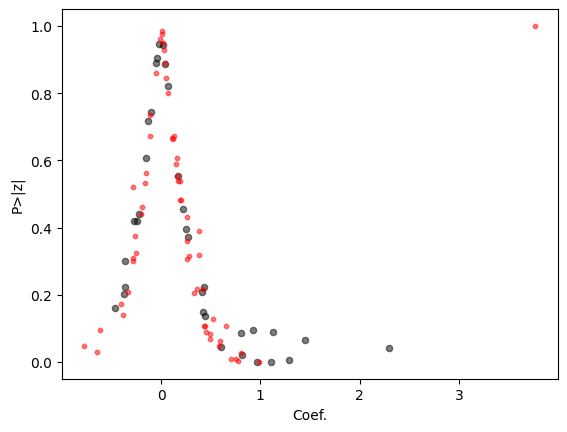

In [1044]:

ax = logistic_regression_fit_table[np.array(F23_coefficients) & np.array(prior_programming_coefficients)].plot.scatter(x='Coef.', y='P>|z|', color='black', alpha=0.5, s=20)
logistic_regression_fit_table[~np.array(F23_coefficients) & np.array(prior_programming_coefficients)].plot.scatter(x='Coef.', y='P>|z|', color='red', ax=ax, alpha=0.5, s=10)